In [ ]:
pcks <- c('gsubfn', 'dplyr', 'tidyr', 'ggplot2', 'extrafont', 'stargazer')
pcks <- sapply(pcks, require, character.only = 1)
if (any(! pcks)) install.packages(names(pcks)[! pcks])

dms = c(50, 200, 800)
qs = c(5, 10)

p.vec1 = c(1, 1) / 2 # balanced
p.vec2 = c(2, 1) / 3 # unbalanced

p.list = list(p.vec1, p.vec2)

lams <- res <- NULL

ls <- list.files('./ncpens/')

for (file.name in ls) {
    message(file.name)
    load(file.path('ncpens', file.name))
    sim.result$res <- as.data.frame(sim.result$res)
    sim.result$res$m <- c(rep('ERR', 6), rep('TPS', 6), rep('FPS', 6), rep('MI', 6)) %>%
    factor(levels = c('ERR', 'TPS', 'FPS', 'MI'))
    tmp <- cbind(s.mat=s.mat[1, 3], prob=round(p.vec[1],digits=2), sim.result$res)
    res <- rbind(res, tmp)
    lams <- rbind(lams, cbind(s = s.mat[1, 3], p1 = p.vec[1], sim.result$lambdas))
}

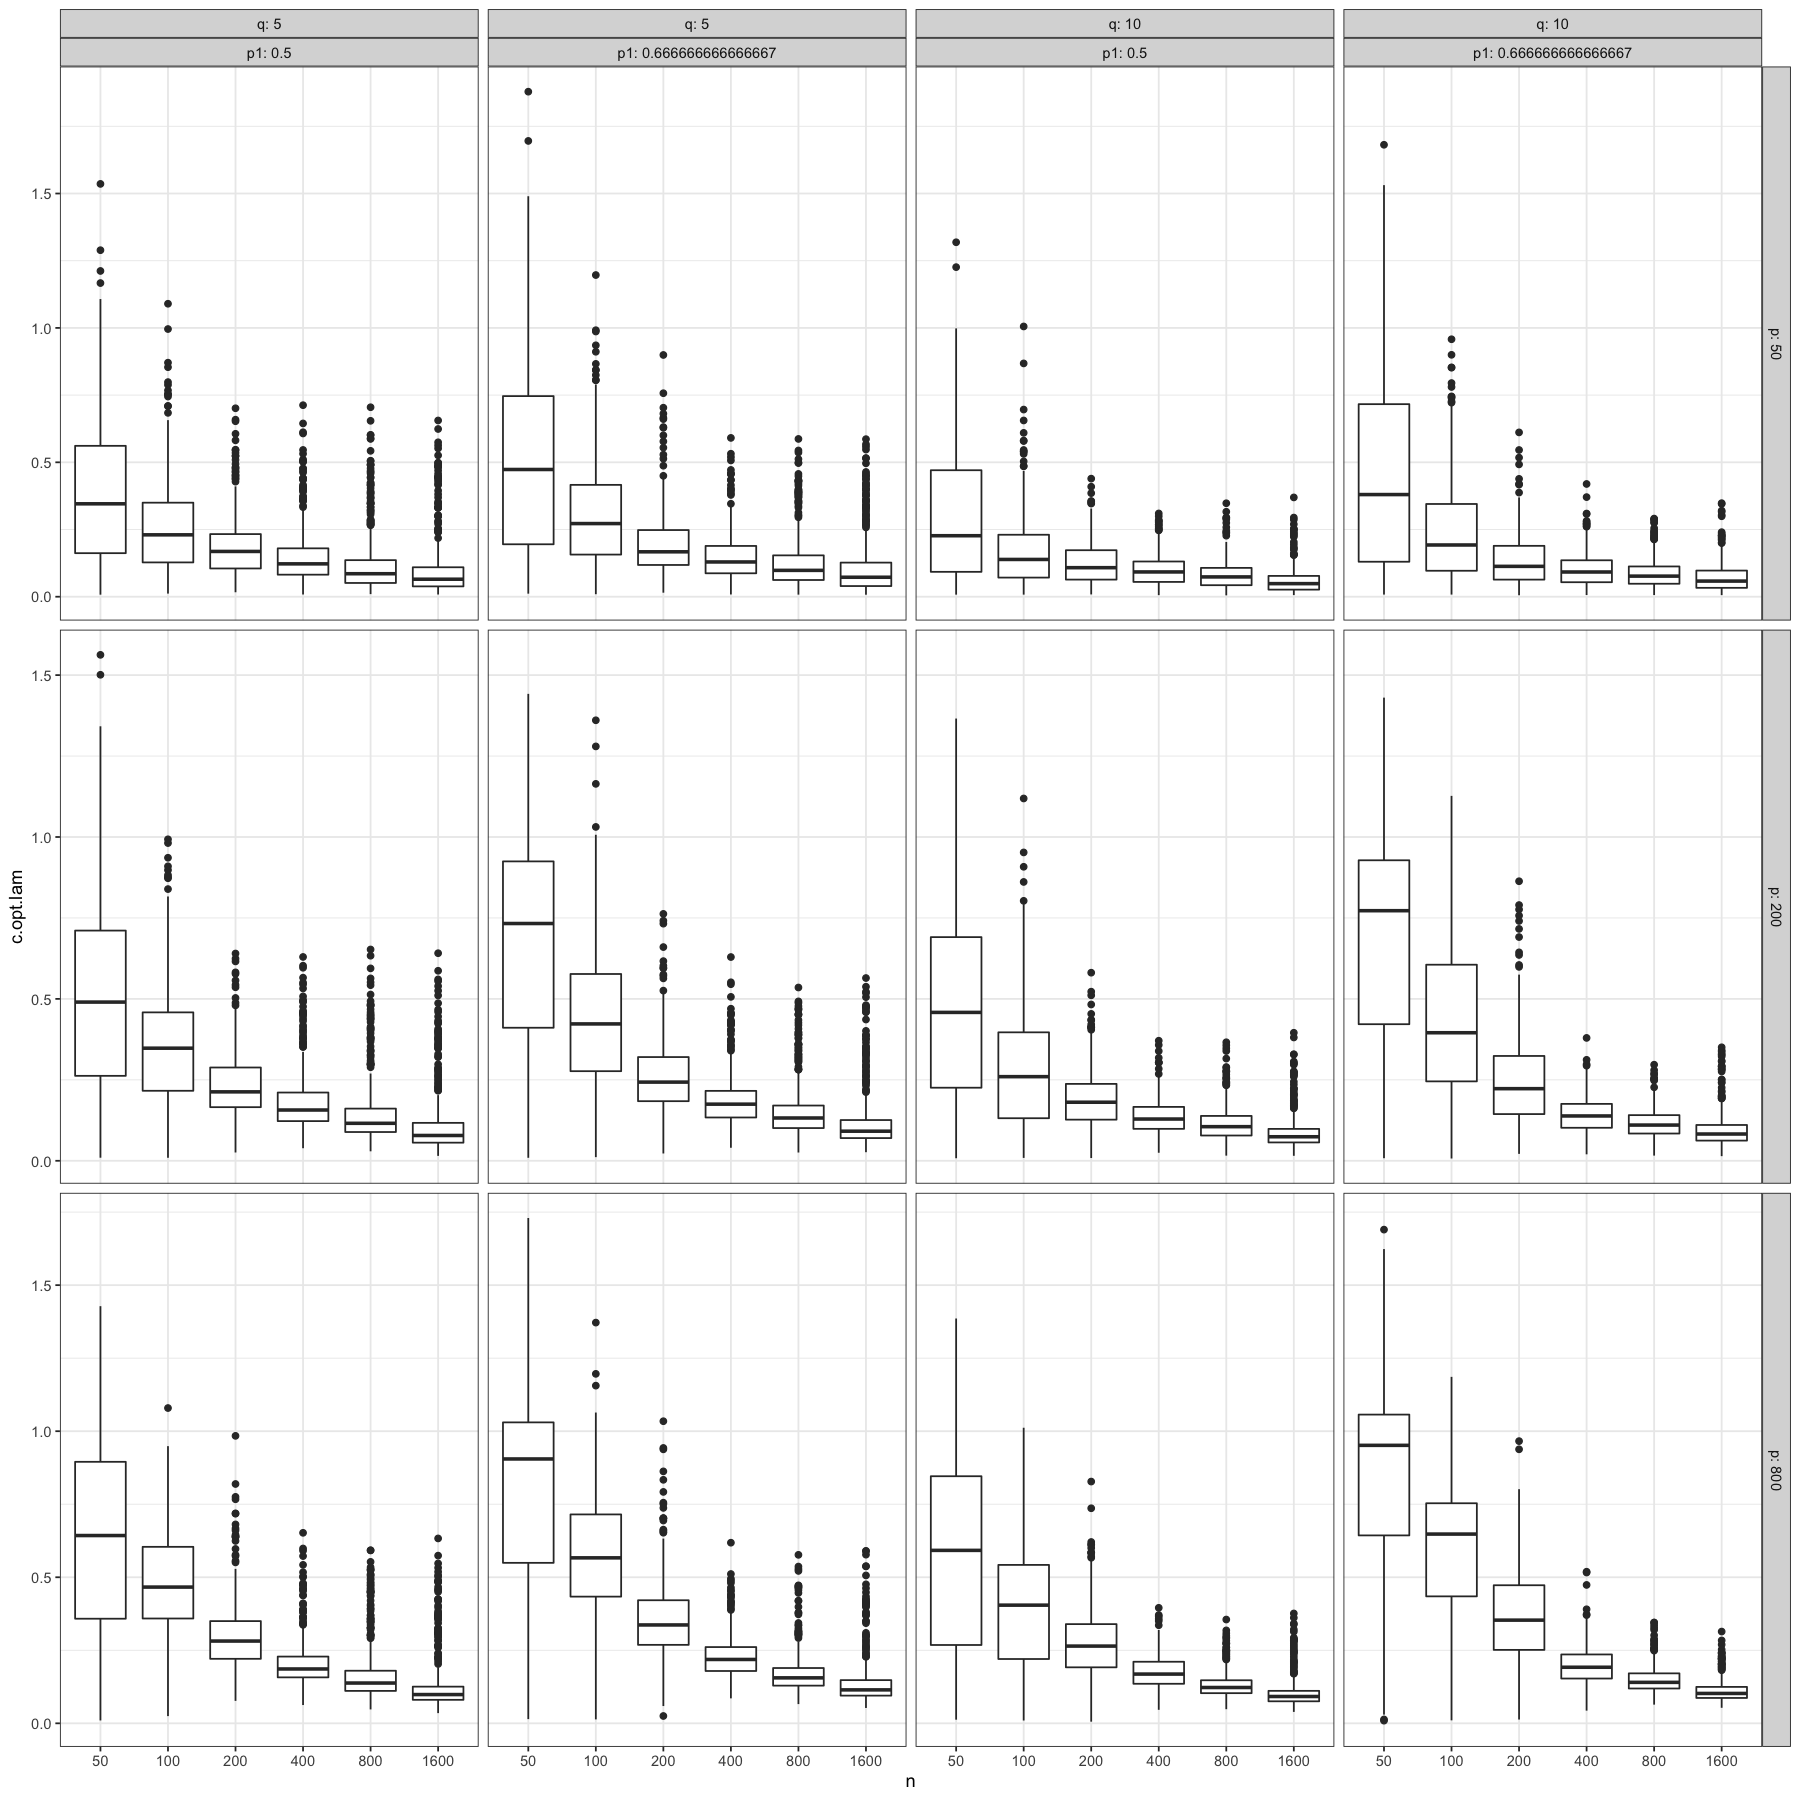

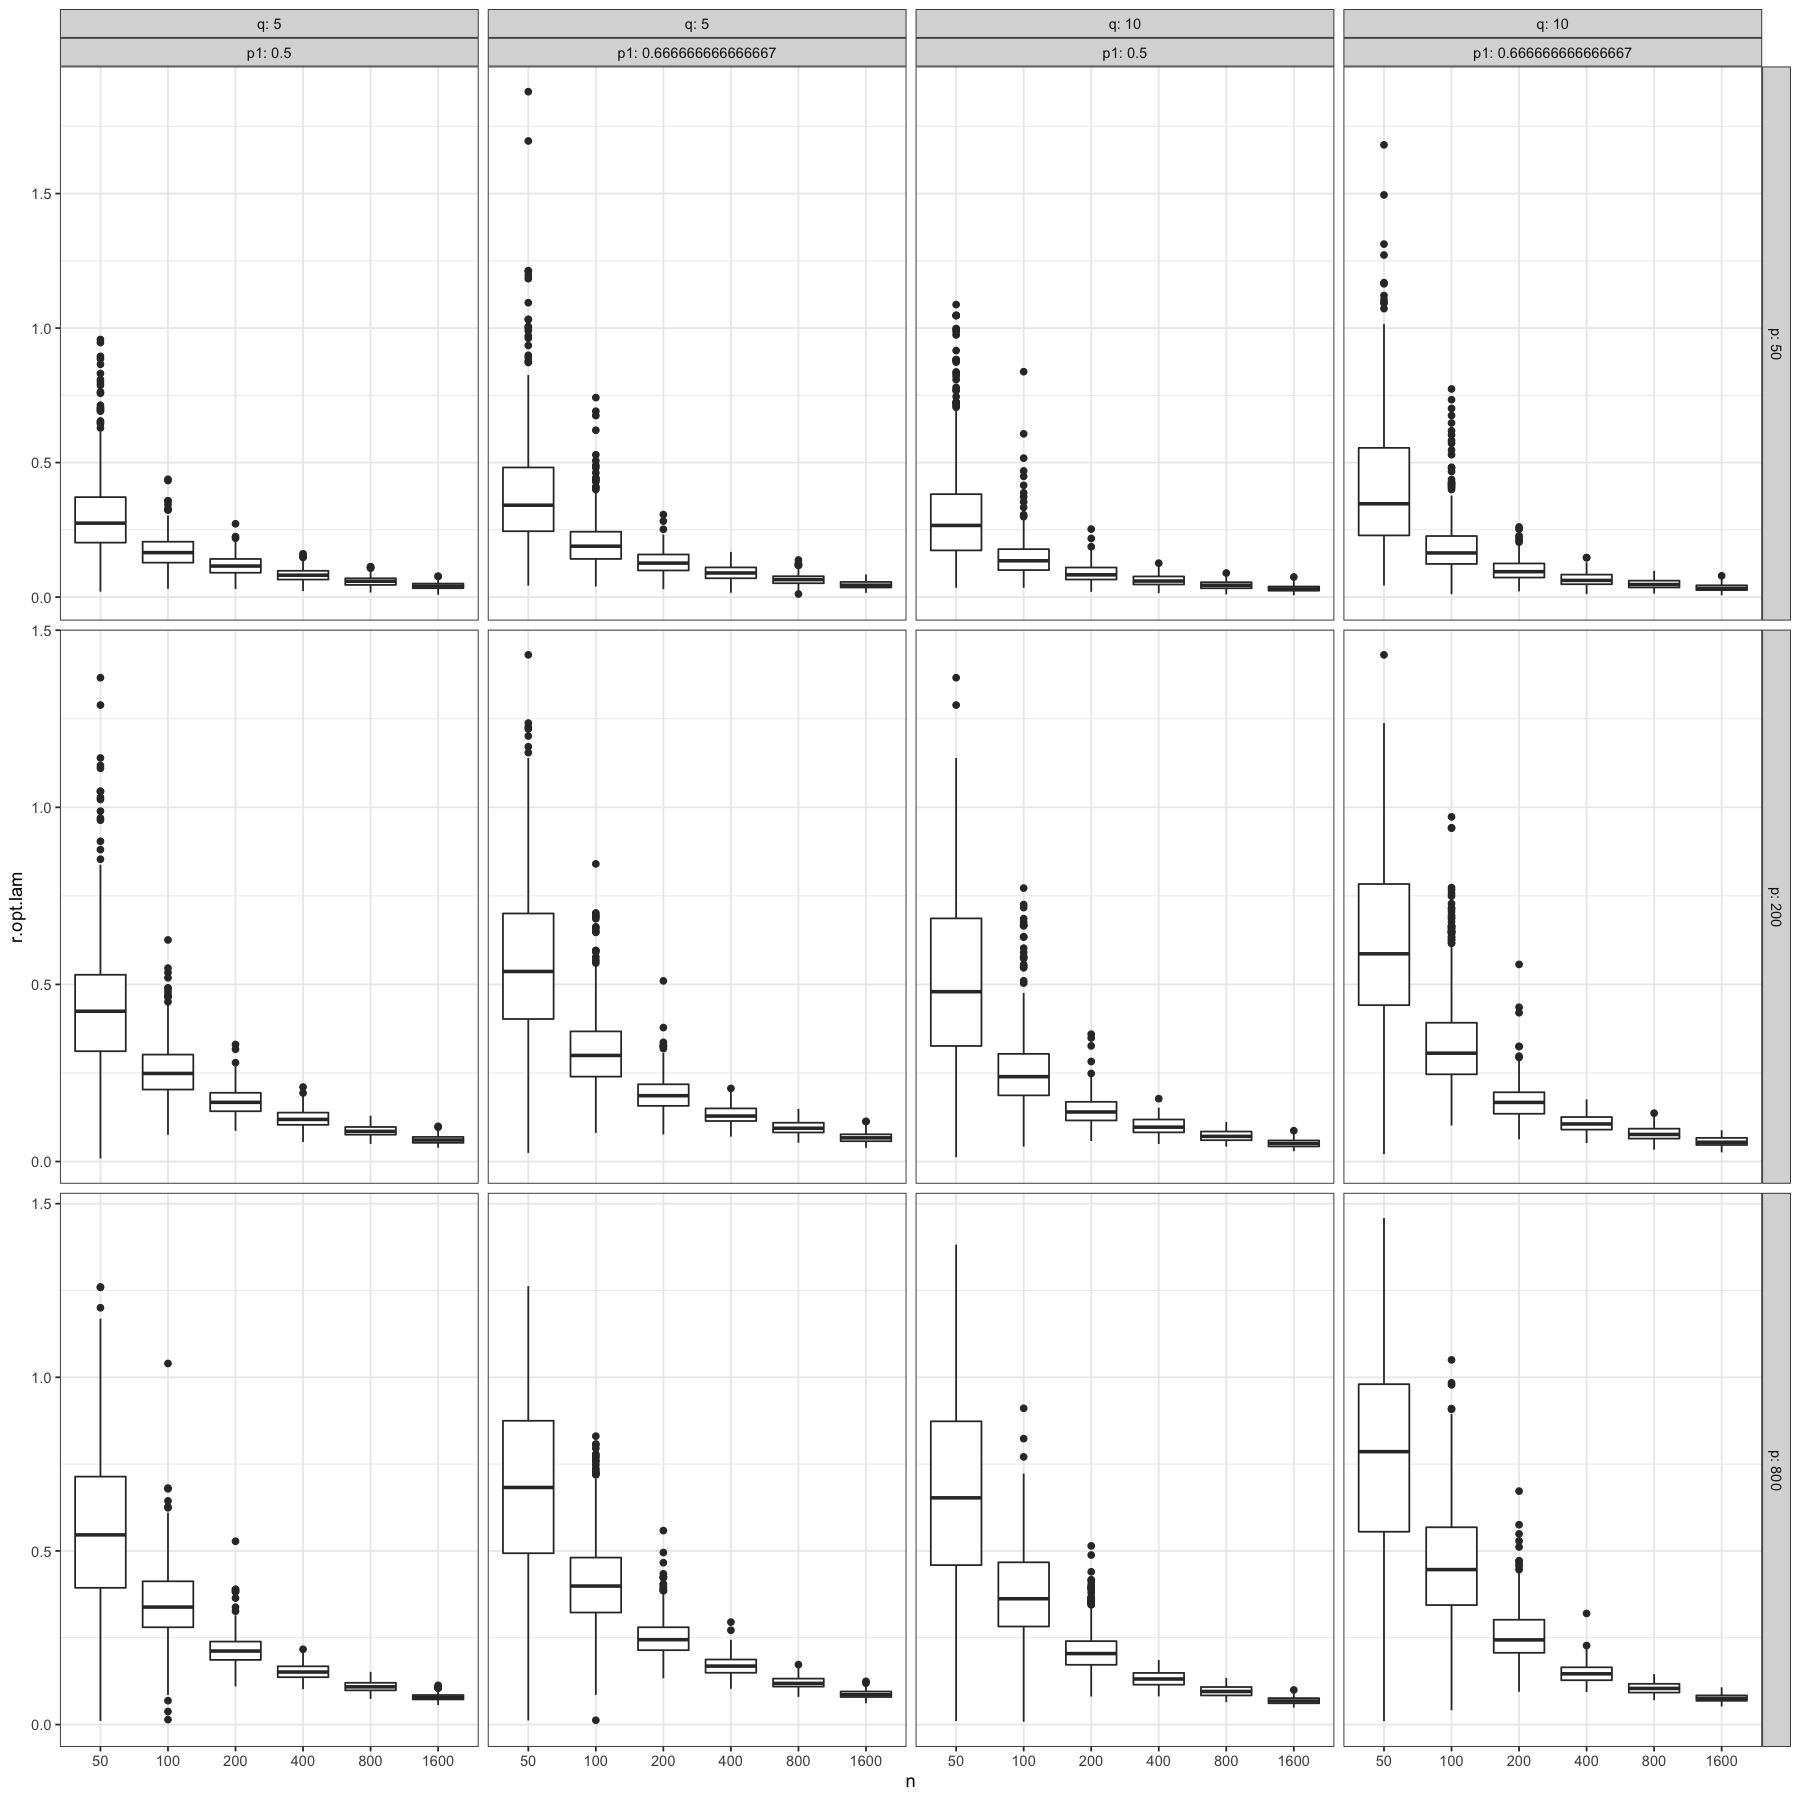

In [2]:
gg <- lams %>% as.data.frame %>% mutate(n = as.factor(n)) %>% {
#     str(.)
    ggplot(., aes(x = n, group = n)) +
    facet_grid(p ~ q + p1, scales = 'free', labeller = label_both) + theme_bw()
}
options(repr.plot.width = 15, repr.plot.height = 15)
gg + geom_boxplot(aes(y = c.opt.lam))
gg + geom_boxplot(aes(y = r.opt.lam))

In [144]:
colnames(res) <- c("s.mat", "prob", "p", "q", "n", 
                   "c.Bayes", "c.Lasso", "c.MCP", "c.SCAD", "c.TLP", "c.Mlog", "c.Mbridge", 
                   "r.Bayes", "r.Lasso", "r.MCP", "r.SCAD", "r.TLP", "r.Mlog", "r.Mbridge", 
                   "Measure")

plot.results <- function(...) {
  ch <- list(...)
  cmmnd <- paste(names(ch), '%in%', ch, collapse = ', ')
  res_long <- fn$identity(
    "res %>% mutate_at(vars(p:r.Mbridge), function(x) as.numeric(as.character(x))) %>%
        filter(`cmmnd`) %>% gather(methods, values, r.Lasso:r.Mbridge, factor_key = TRUE)"
  ) %>%
    parse(text = .) %>% eval
#   res_long[1:3, ] %>% stargazer(type = 'text', summary = F)
  
  n.vec <- res_long$n %>% unique
  q0 <- res_long$q[1]
#     nc <- 3
#   options(repr.plot.width = 3 * nc, repr.plot.height = 15)
  gg <-
    res_long %>% ggplot(aes(x = n, y = values, grnormp = methods)) +
    facet_wrap(Measure ~ p, scales = "free", labeller = label_both, ncol = 3) +
    ylab(NULL) + geom_line(aes(lty = methods, col = methods)) +
    geom_point(aes(shape = methods, col = methods), size = 1.5) +
    scale_x_log10(name = "n", n.vec) + scale_shape_manual(values = 0:5) +
    theme_bw(base_family = "Times New Roman", base_size = 10)
  
  return(list(
    gg,
    fn$identity("`paste(names(ch), '.', ch, sep = '', collapse = '.')`.png")
  ))
}

for (s in c(0, .25)) for (p in c(.5, .67)) for (q in c(5, 10)) {
    gg.o <- plot.results(s.mat = s, prob = p, q = q)
    ggsave(gg.o[[2]], width = 18, height = 18, units = "cm")
}

In [152]:
res %>% mutate_at(vars(p:r.Mbridge), function(x) as.numeric(as.character(x))) %>%
                  filter() %>% select(-(c.Bayes:c.Mbridge)) %>%
                  arrange(s.mat, prob, p, q) %>%
                  t

[,1]       [,2]       [,3]       [,4]       [,5]       [,6]      
s.mat     0.00       0.00       0.00       0.00       0.00       0.00      
prob      0.50       0.50       0.50       0.50       0.50       0.50      
p          50         50         50         50         50         50       
q          5          5          5          5          5          5        
n           50        100        200        400        800       1600      
r.Bayes    0.1999500  0.2015500  0.1998375  0.1995000  0.1996281  0.2011156
r.Lasso    0.2878000  0.2394250  0.2166750  0.2080750  0.2032687  0.2027484
r.MCP      0.3149500  0.2510750  0.2117875  0.2033250  0.2013437  0.2018516
r.SCAD     0.2942000  0.2476750  0.2131750  0.2035062  0.2011500  0.2017672
r.TLP      0.3172500  0.2504750  0.2118500  0.2031187  0.2014219  0.2018469
r.Mlog     0.3159500  0.2504250  0.2117750  0.2031313  0.2014375  0.2018484
r.Mbridge  0.3124000  0.2490750  0.2116125  0.2034125  0.2014969  0.2018984
Measure   ERR        ERR        ERR        ERR        ERR        ERR       
          [,7]       [,8]       [,9]       [,10]      [,11] [,12]     
s.mat     0.00       0.00       0.00       0.00       ⋯     0.25      
prob      0.50       0.50       0.50       0.50       ⋯     0.67      
p          50         50         50         50        ⋯     800       
q          5          5          5          5         ⋯     10        
n           50        100        200        400       ⋯      200      
r.Bayes    5.0000000  5.0000000  5.0000000  5.0000000 ⋯      0.0000000
r.Lasso    4.0300000  4.8550000  5.0000000  5.0000000 ⋯     26.2650000
r.MCP      2.1950000  3.8250000  4.9100000  5.0000000 ⋯      0.5100000
r.SCAD     3.4650000  4.6550000  4.9700000  5.0000000 ⋯     22.2200000
r.TLP      2.1800000  3.8350000  4.9000000  5.0000000 ⋯      0.4700000
r.Mlog     2.1800000  3.8350000  4.9000000  5.0000000 ⋯      0.4750000
r.Mbridge  2.2700000  3.9050000  4.9250000  5.0000000 ⋯      0.6750000
Measure   TPS        TPS        TPS        TPS        ⋯     FPS       
          [,13]      [,14]      [,15]      [,16]      [,17]      [,18]     
s.mat     0.25       0.25       0.25       0.25       0.25       0.25      
prob      0.67       0.67       0.67       0.67       0.67       0.67      
p         800        800        800        800        800        800       
q         10         10         10         10         10         10        
n          400        800       1600         50        100        200      
r.Bayes    0.0000000  0.0000000  0.0000000  1.0000000  1.0000000  1.0000000
r.Lasso   67.7500000 73.9500000 73.1000000  0.0000000  0.0000000  0.0000000
r.MCP      2.0000000  0.5500000  0.0850000  0.0000000  0.0000000  0.0000000
r.SCAD    44.5850000 18.3800000  3.9500000  0.0000000  0.0000000  0.0000000
r.TLP      2.1050000  0.7150000  0.1100000  0.0000000  0.0000000  0.0000000
r.Mlog     2.0800000  0.7250000  0.1150000  0.0000000  0.0000000  0.0000000
r.Mbridge  2.5200000  0.8000000  0.1150000  0.0000000  0.0000000  0.0000000
Measure   FPS        FPS        FPS        MI         MI         MI        
          [,19]      [,20]      [,21]     
s.mat     0.25       0.25       0.25      
prob      0.67       0.67       0.67      
p         800        800        800       
q         10         10         10        
n          400        800       1600      
r.Bayes    1.0000000  1.0000000  1.0000000
r.Lasso    0.0000000  0.0000000  0.0000000
r.MCP      0.0050000  0.6800000  0.9250000
r.SCAD     0.0000000  0.0000000  0.2400000
r.TLP      0.0000000  0.6200000  0.8950000
r.Mlog     0.0050000  0.6150000  0.8900000
r.Mbridge  0.0050000  0.5750000  0.8900000
Measure   MI         MI         MI